In [20]:
from skimage.measure import compare_ssim as ssim

In [93]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Gaussiana

$s_2$ = Laplaciana

In [97]:
sources = np.loadtxt(source_path+'/'+'FirstSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'FirstMixMatrix.txt')

x = np.loadtxt(obs_path+'FirstMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [73]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.78275299,  0.54889837,  0.31331909],
       [ 0.54889837,  2.06550892,  0.64245581],
       [ 0.31331909,  0.64245581,  2.08918704]])

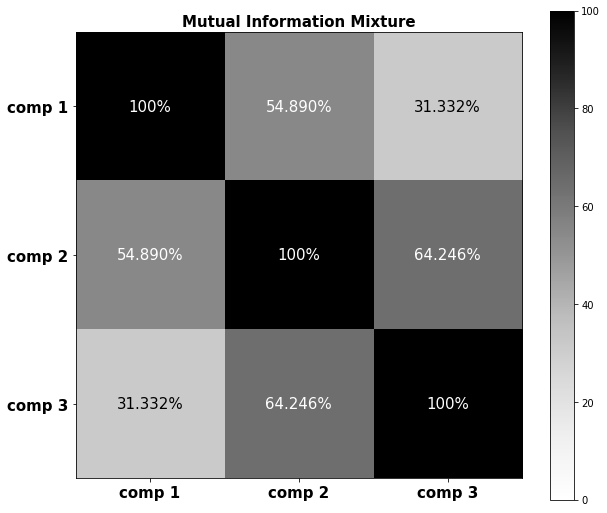

In [27]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture')#,output=save_images,name='run1_mix_MI_100',save=True)

In [74]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.77254275,  0.09234297,  0.14129256],
       [ 0.09234297,  1.9677803 ,  0.18075824],
       [ 0.14129256,  0.18075824,  2.24944434]])

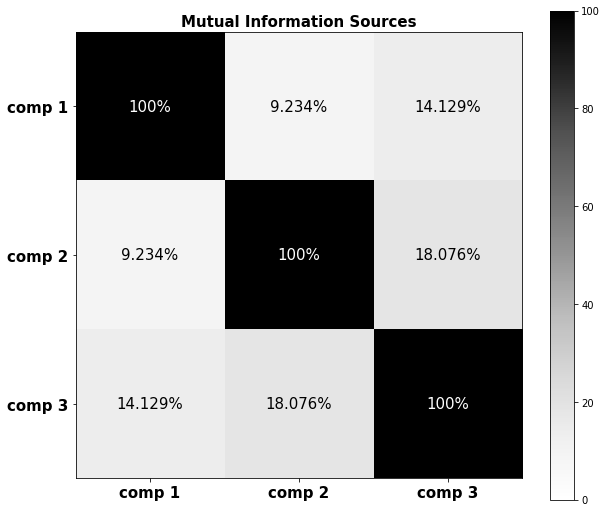

In [29]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources')#,output=save_images,name='run_sources_MI_100',save=True)

In [30]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

([array([[ 0.19633556,  0.10533316,  0.39592831],
         [ 0.50110261,  0.19114577,  0.12968076],
         [ 0.5045015 ,  0.23059162,  0.0940266 ]]),
  array([[ 0.29884401,  0.49263639,  0.49743221],
         [ 0.11444944,  0.25419354,  0.26027811],
         [ 0.33343548,  0.10309391,  0.0834194 ]])],
 array([[ 0.24758978,  0.29898477,  0.44668026],
        [ 0.30777602,  0.22266966,  0.19497943],
        [ 0.41896849,  0.16684277,  0.088723  ]]),
 array([[ 0.49461962,  0.12304192,  0.22565522],
        [ 0.28209037,  0.12146036,  0.26658099],
        [ 0.3180378 ,  0.23221848,  0.04960737]]))

In [31]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 7
Time to converges the FastICA: 0.309 seconds


In [99]:
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

In [34]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  5.79622812327 E2 =  3.74415332844


In [75]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 2.22628326,  0.20609169,  0.14282226],
       [ 0.20609169,  1.89507876,  0.11609295],
       [ 0.14282226,  0.11609295,  1.78118784]])

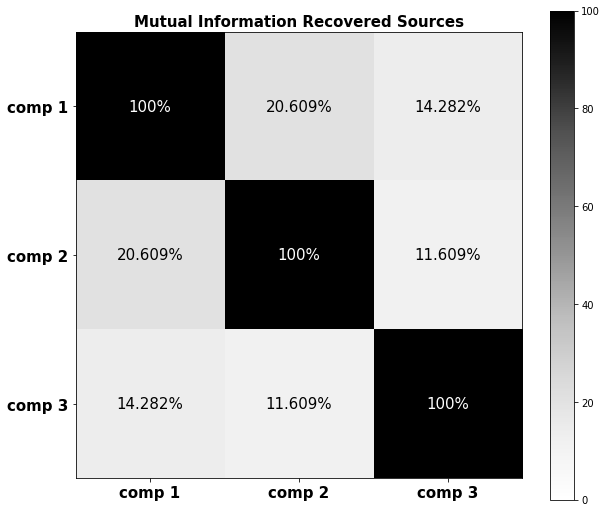

In [76]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources')#,output=save_images,name='run_reco_MI_100',save=True)

In [78]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(recovered_sources,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(recovered_sources,sources)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [79]:
SKL_div,JS_div

(array([[ 0.57191297,  0.30974025,  0.11675064],
        [ 0.30018478,  0.0879555 ,  0.26726014],
        [ 0.12232936,  0.26870199,  0.47505406]]),
 array([[ 0.27246589,  0.18580074,  0.05111998],
        [ 0.14818599,  0.0771263 ,  0.20383605],
        [ 0.09377766,  0.15847783,  0.27111805]]))

In [85]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.272466 &  0.185801 &  0.051120 \\
1 &  0.148186 &  0.077126 &  0.203836 \\
2 &  0.093778 &  0.158478 &  0.271118 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.571913 &  0.309740 &  0.116751 \\
1 &  0.300185 &  0.087956 &  0.267260 \\
2 &  0.122329 &  0.268702 &  0.475054 \\
\bottomrule
\end{tabular}



In [89]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.17115415,  0.11250129,  1.03584293],
       [ 0.22412766,  0.70859117,  0.21578373],
       [ 1.38717678,  0.256192  ,  0.14195771]])

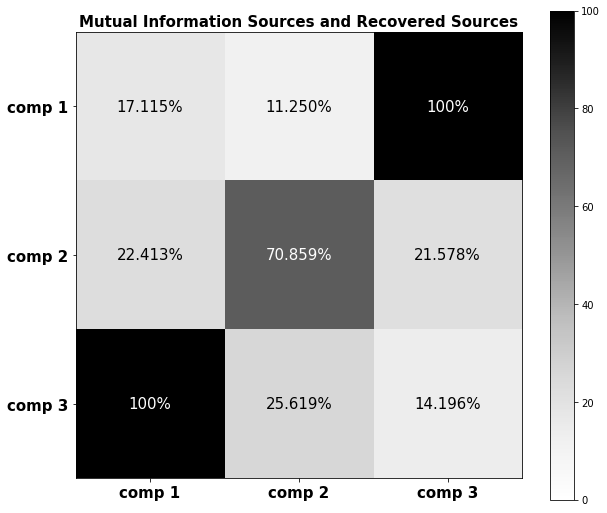

In [90]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run_sourcesreco_MI_100',save=True)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


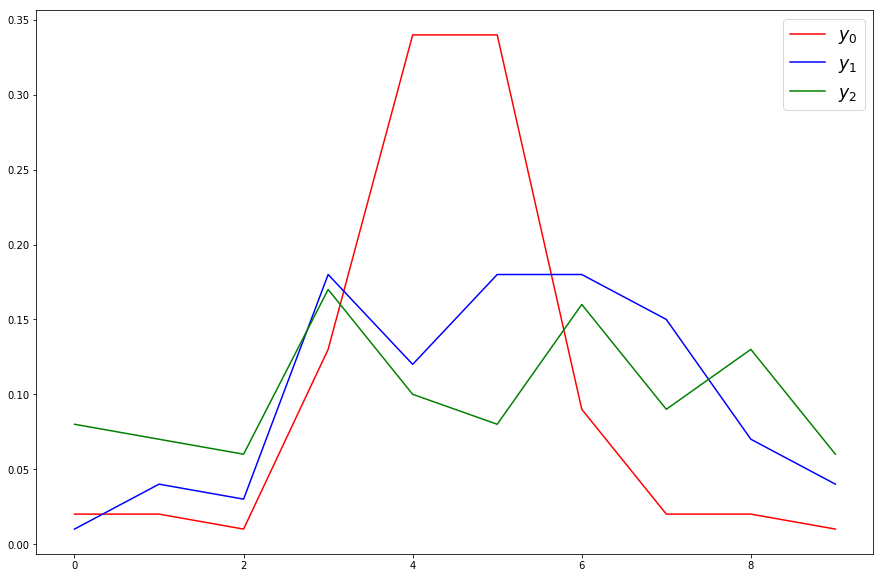

In [91]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
#plt.savefig(save_images+'/'+'Estimated_pdf_ICA100_run1.png')
plt.show()

In [105]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 1.03584293,  0.11250129,  0.17115415],
       [ 0.21578373,  0.70859117,  0.22412766],
       [ 0.14195771,  0.256192  ,  1.38717678]])

In [106]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[ 7.        ,  0.        ,  0.        ],
       [ 0.309     ,  0.        ,  0.        ],
       [ 5.79622812,  0.        ,  0.        ],
       [ 3.74415333,  0.        ,  0.        ],
       [ 1.87228988,  0.        ,  0.        ]])

# Using 1000 stats

In [107]:
sources = np.loadtxt(source_path+'/'+'FirstSource1000Stats.txt')

x = np.loadtxt(obs_path+'FirstMixture1000Stats.txt')


In [112]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 2.58721045,  0.7149221 ,  0.1909349 ],
       [ 0.7149221 ,  2.72984154,  0.35229415],
       [ 0.1909349 ,  0.35229415,  2.90086929]])

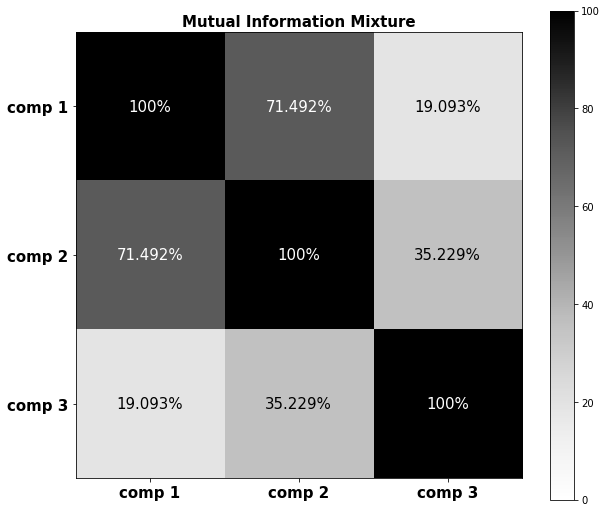

In [113]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run1_mix_MI_1000',save=True)

In [114]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 2.39338145,  0.04532577,  0.04689893],
       [ 0.04532577,  2.77696413,  0.19126176],
       [ 0.04689893,  0.19126176,  2.97703831]])

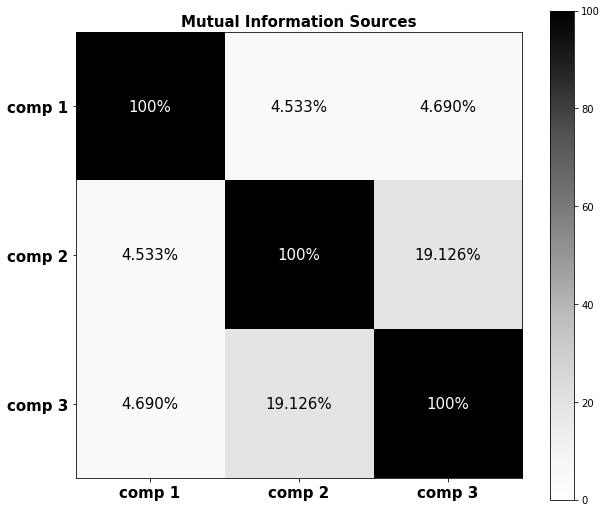

In [115]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run_sources_MI_1000',save=True)

In [118]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 3
Time to converges the FastICA: 0.003 seconds


In [119]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 2.44934633,  0.05488831,  0.04913128],
       [ 0.05488831,  2.77850537,  0.18958348],
       [ 0.04913128,  0.18958348,  2.97275223]])

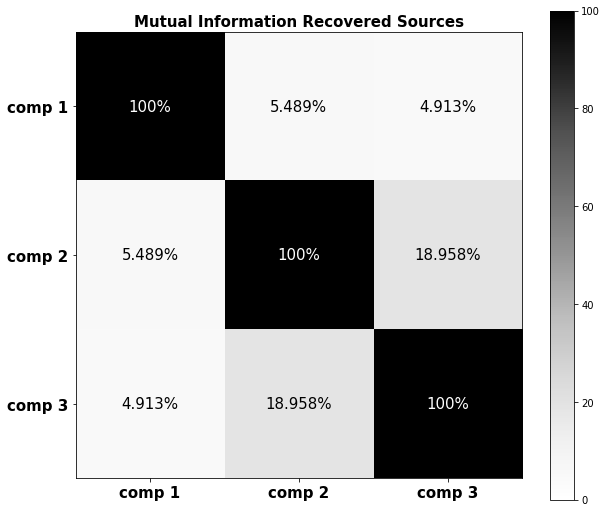

In [120]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run_reco_MI_1000',save=True)

In [121]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(recovered_sources,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(recovered_sources,sources)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [122]:
SKL_div,JS_div

(array([[ 0.12448932,  0.56549942,  0.5886187 ],
        [ 0.35175576,  0.08955163,  0.4467982 ],
        [ 0.55234728,  0.36265548,  0.02047333]]),
 array([[ 0.04873251,  0.26909587,  0.2664634 ],
        [ 0.21114022,  0.04697811,  0.26016251],
        [ 0.28895535,  0.18036003,  0.01002537]]))

In [123]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.048733 &  0.269096 &  0.266463 \\
1 &  0.211140 &  0.046978 &  0.260163 \\
2 &  0.288955 &  0.180360 &  0.010025 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.124489 &  0.565499 &  0.588619 \\
1 &  0.351756 &  0.089552 &  0.446798 \\
2 &  0.552347 &  0.362655 &  0.020473 \\
\bottomrule
\end{tabular}



In [124]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 1.8001185 ,  0.04395626,  0.04643849],
       [ 0.05807972,  2.33154057,  0.18424348],
       [ 0.04790911,  0.1934846 ,  2.61086405]])

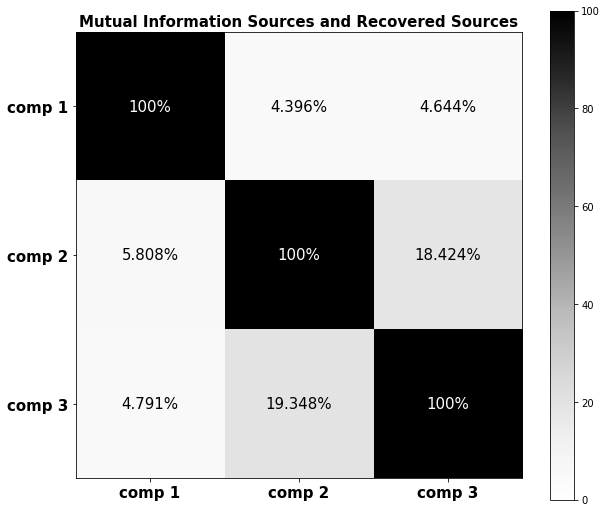

In [125]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run_sourcesreco_MI_1000',save=True)

In [126]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  7.00000000e+00,   3.00000000e+00,   0.00000000e+00],
       [  3.09000000e-01,   3.00000000e-03,   0.00000000e+00],
       [  5.79622812e+00,   6.58012243e+00,   0.00000000e+00],
       [  3.74415333e+00,   4.52746734e+00,   0.00000000e+00],
       [  1.87228988e+00,   1.41243099e+00,   0.00000000e+00]])

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


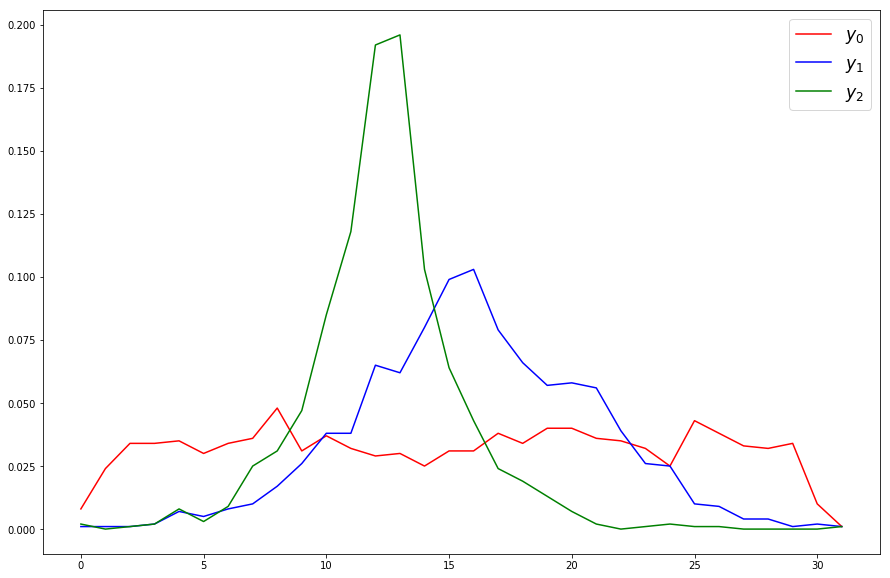

In [38]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA1000_run1.png')
plt.show()

# Using 100K stats

In [44]:
x = np.loadtxt('FirstMixture100000Stats.txt')
x.shape

(3, 100000)

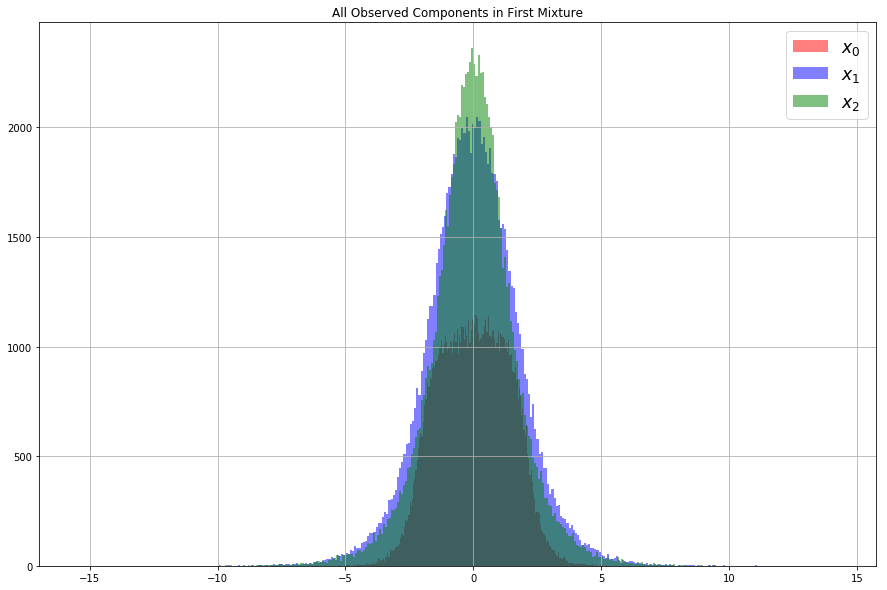

In [45]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100000_all_run1.png')
plt.show()

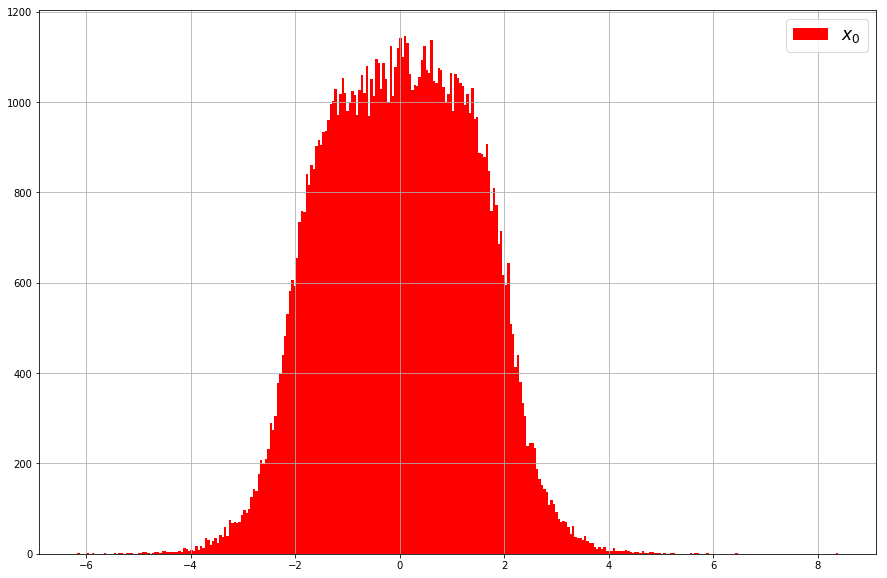

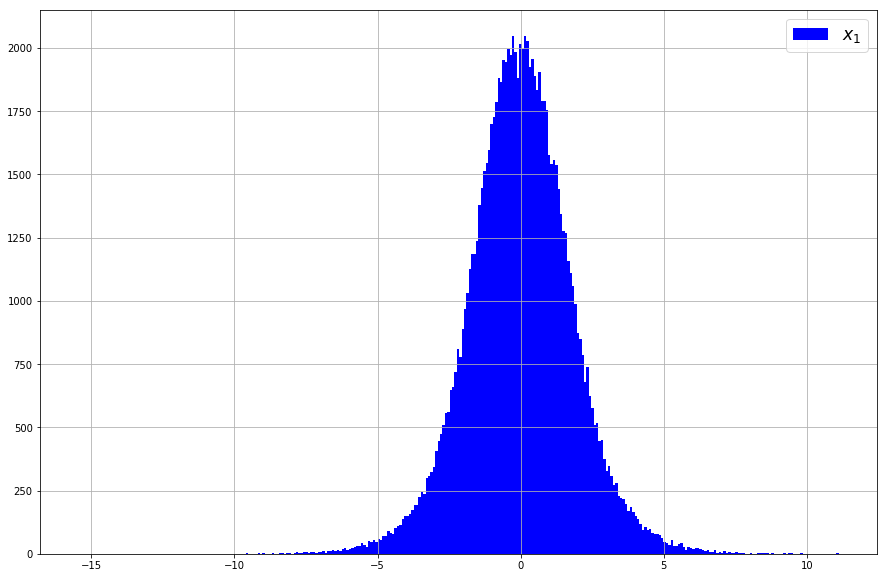

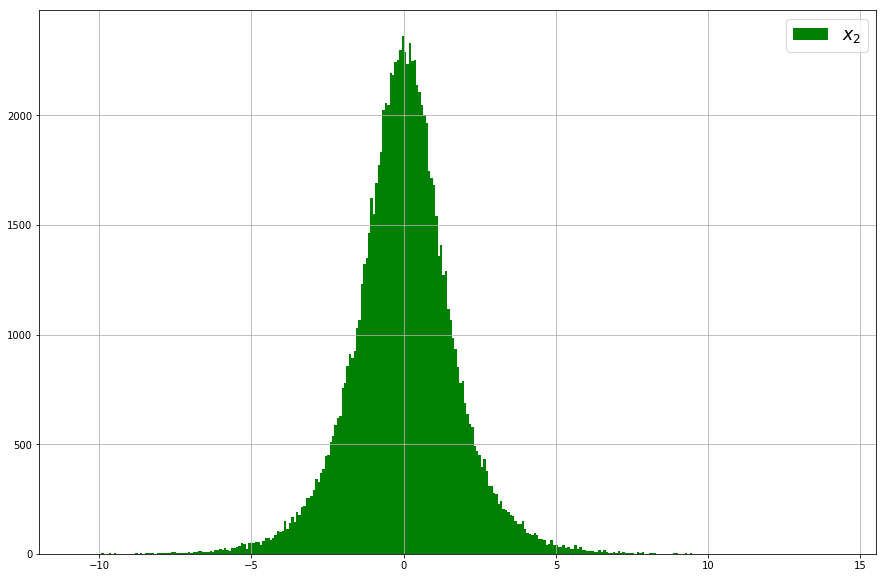

In [46]:

colors = ['r','b','g']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100000_component_'+str(i)+'_run1.png')
    plt.show()

In [47]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 3
Time to converges the FastICA: 0.220 seconds


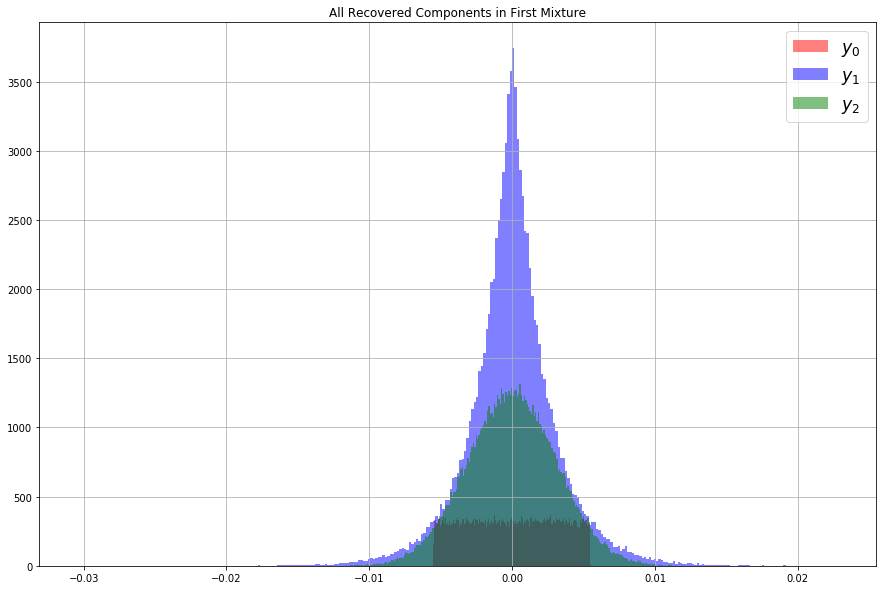

In [48]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100000_all_run1.png')
plt.show()

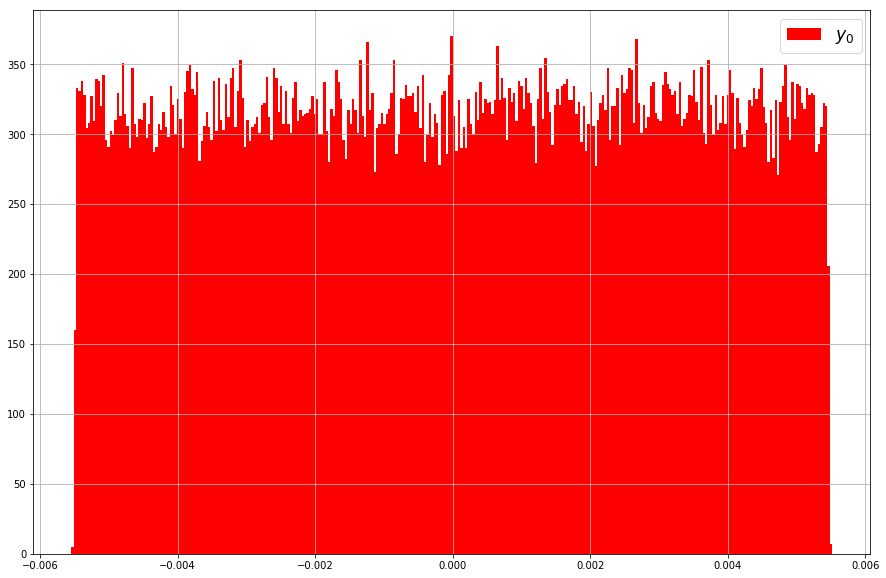

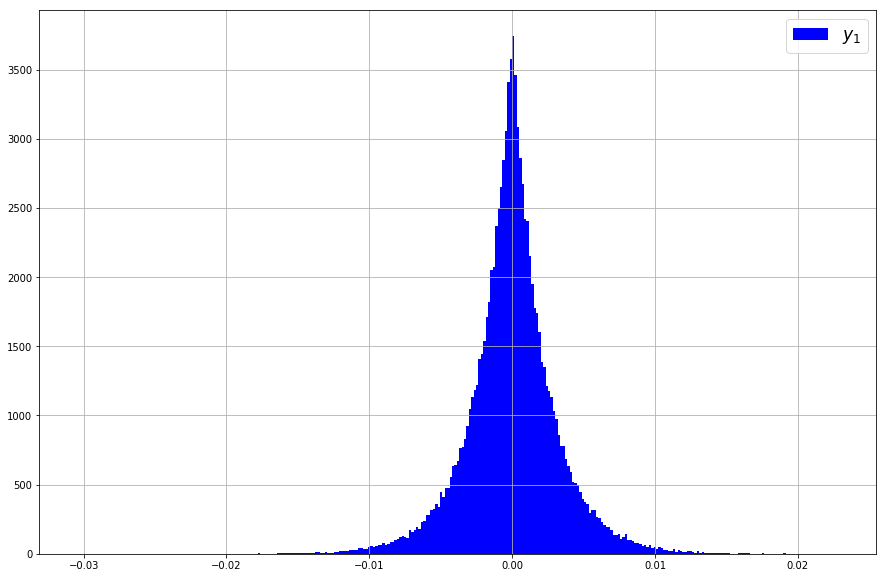

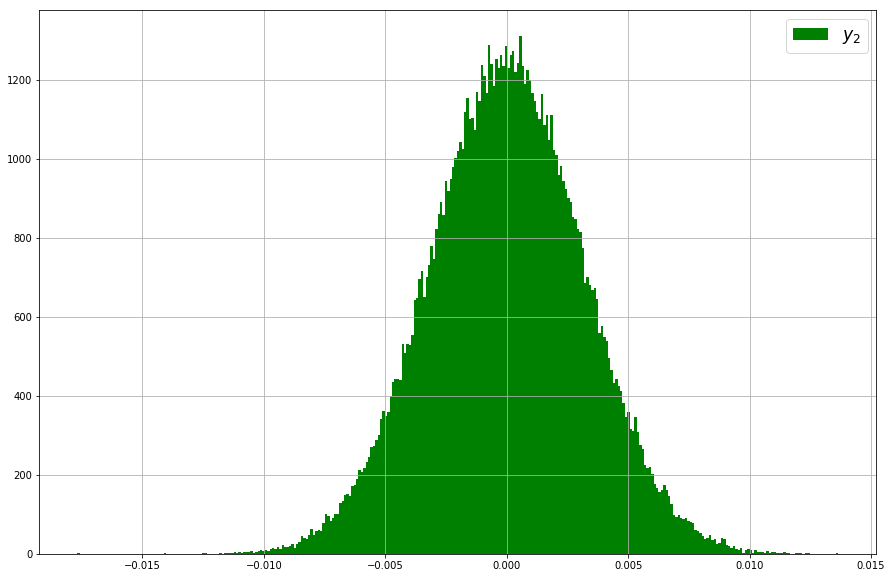

In [49]:

colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA10000_component_'+str(i)+'_run1.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


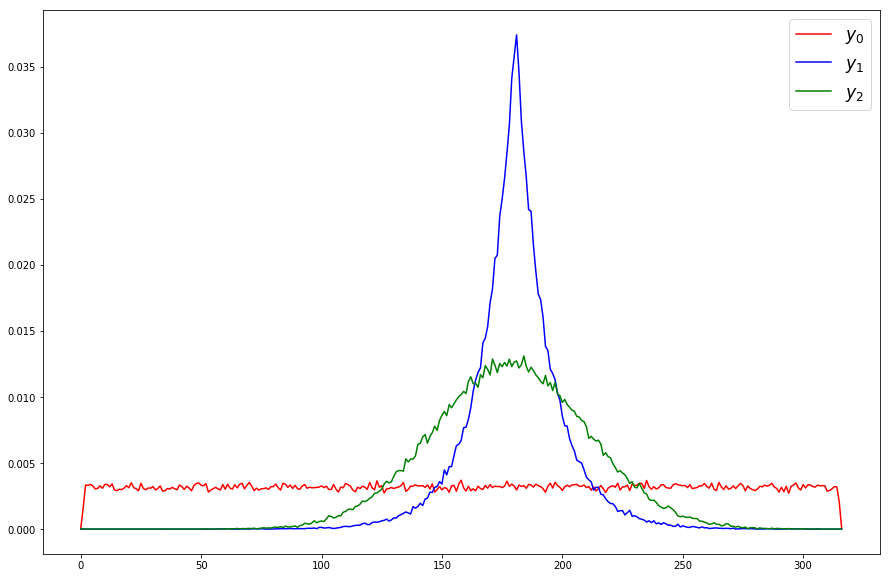

In [50]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100000_run1.png')
plt.show()

In [51]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [52]:
bins = 150

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


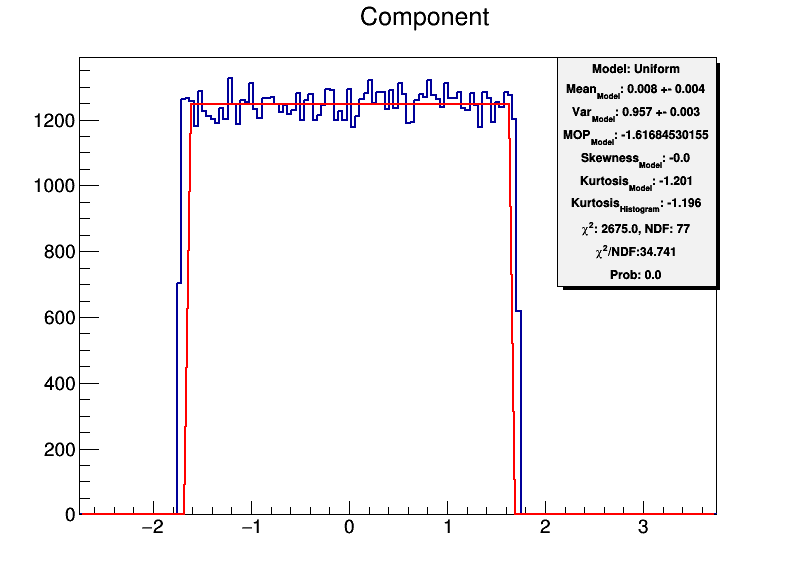

In [53]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("same")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


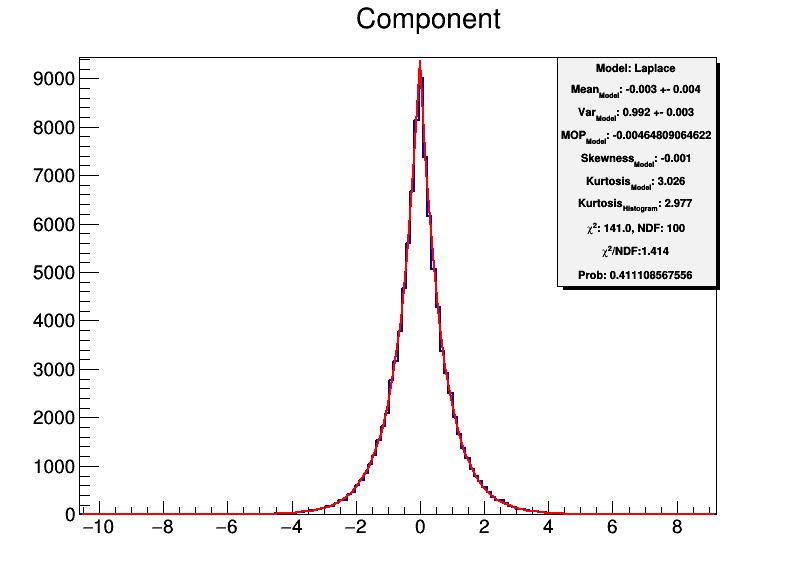

In [54]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


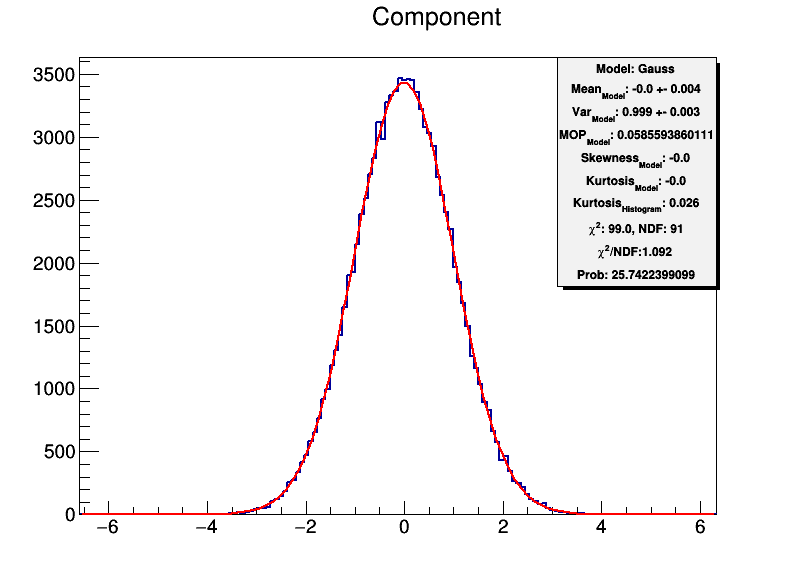

In [55]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:])-1, np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100000_run1.png')
c
